In [26]:
#Using pandas for loading the csv file into a dataframe
import pandas as pd

#Using matplotlib library for basic graph plotting
import matplotlib.pyplot as plt

#Using seaborn library that allows us to optimize matplotlib's output
import seaborn as sns

import matplotlib.pyplot as plt

In [27]:
climber = pd.read_csv('climber_df.csv')
climber.head(5)

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010


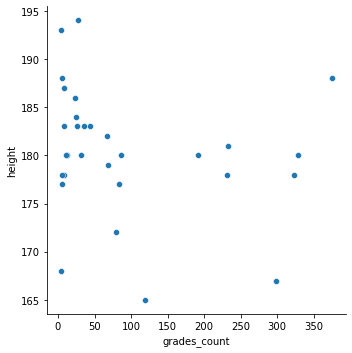

In [28]:
##Generate at least 3 data visualizations
sns.relplot(data=climber.head(30), x="grades_count", y="height")

<AxesSubplot:xlabel='years_cl', ylabel='grades_mean'>

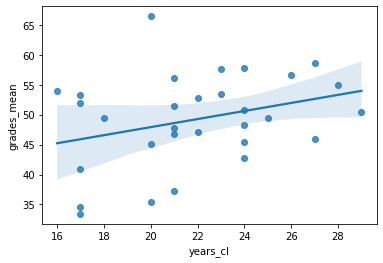

In [29]:
sns.regplot(data=climber.head(30), x="years_cl", y="grades_mean")

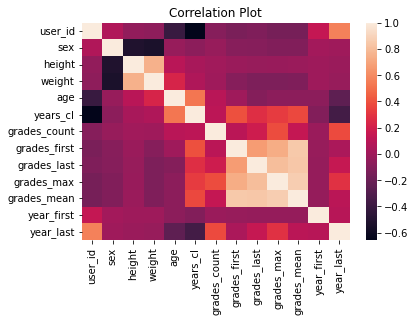

In [30]:
sns.heatmap(climber.corr())
plt.title('Correlation Plot')
plt.show()

In [31]:
#Finding how many Nans in the dataset
climber.isna().sum()

user_id         0
country         0
sex             0
height          0
weight          0
age             0
years_cl        0
date_first      0
date_last       0
grades_count    0
grades_first    0
grades_last     0
grades_max      0
grades_mean     0
year_first      0
year_last       0
dtype: int64

In [32]:
climber['sex'].value_counts()

0    9560
1    1367
Name: sex, dtype: int64

In [33]:
#Splitting the dataset into features and targets
y = climber[['sex']].values
X = climber[['height', 'weight', 'years_cl']].values

In [34]:
#Splitting the dataset into training and test sets in the ratio 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [37]:
#Performing KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [38]:
#Performing Naive-Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [39]:
#Performing 5 fold cross validation
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9131807281447569


In [40]:
#Performing 5 fold cross validation
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9215476816407836


In [41]:
# Predicting the Test set results- KNN
y_pred = knn.predict(X_test)

In [42]:
# Predicting the Test set results- Naive Bayes
y_pred_gnb = gnb.predict(X_test)

In [43]:
#Generating a classification report-KNN
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2866
           1       0.66      0.62      0.64       413

    accuracy                           0.91      3279
   macro avg       0.81      0.79      0.80      3279
weighted avg       0.91      0.91      0.91      3279



In [44]:
#Generating a classification report- GNB
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2866
           1       0.65      0.73      0.68       413

    accuracy                           0.92      3279
   macro avg       0.80      0.83      0.82      3279
weighted avg       0.92      0.92      0.92      3279

